In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#binary_df=pd.read_excel("binary activation.xlsx",sheetname="hour of activation")
#binary_df.index = np.arange(1, len(binary_df) + 1)
Heat_Out_df=pd.read_excel("results_conversion.xlsx",sheetname="Output_energy_Heat")
Ele_Out_df=pd.read_excel("results_conversion.xlsx",sheetname="Output_energy_Elec")
Energy_In_df=pd.read_excel("results_conversion.xlsx",sheetname="Input_energy")
#P_Trl_df=pd.read_excel("results_TRLplus.xlsx",sheetname="P_TRLplus")
#Income_E_Trl_df=pd.read_excel("results_TRLplus.xlsx",sheetname="Income_E_TRLplus")
#Income_P_Trl_df=pd.read_excel("results_TRLplus.xlsx",sheetname="Income_P_TRLplus")
Demands_df=pd.read_excel("results_demands.xlsx")
Storage_SOC_df=pd.read_excel("results_storage.xlsx",sheetname="Storage_SOC")
Storage_In_df=pd.read_excel("results_storage.xlsx",sheetname="Storage_input_energy")
Storage_Out_df=pd.read_excel("results_storage.xlsx",sheetname="Storage_output_energy")

In [4]:
def plot_stackedBars(df,i_start,i_ende,x_label="Hours",y_label="Power [kWh]"):
    plot_df=df.loc[i_start:i_ende,:]
    fig,ax=plt.subplots(figsize=(8,4.5))
    
    #Width is the width of the column/bar
    width=0.8
    xlocations=np.array(range(len(plot_df)+2))
    ajdlocs=xlocations[1:-1]-width/2.0
    categories=plot_df.columns
    clp=sns.color_palette("Set2",len(categories))
    
    for i in range(0,len(categories)):
        ax.bar(ajdlocs,plot_df[categories[i]],label=categories[i],bottom=plot_df[categories[0:i]].sum(axis=1),color=clp[i])
    ax.set_xticks(ticks=xlocations[1:-1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(loc="best")
    fig.tight_layout(pad=2)
    return fig,ax

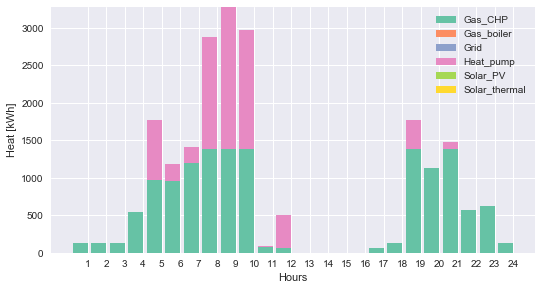

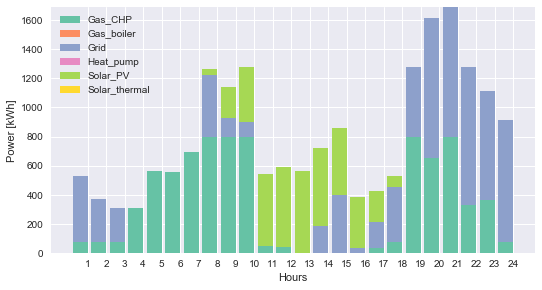

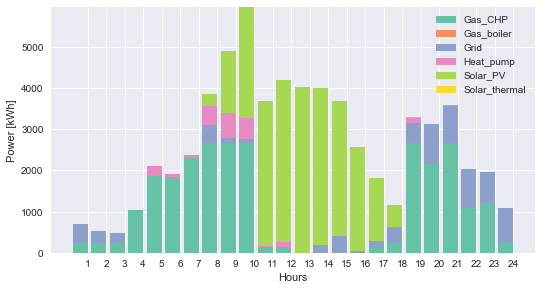

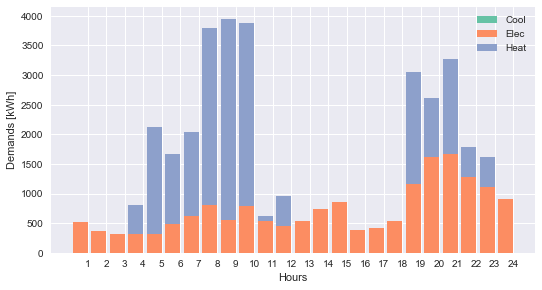

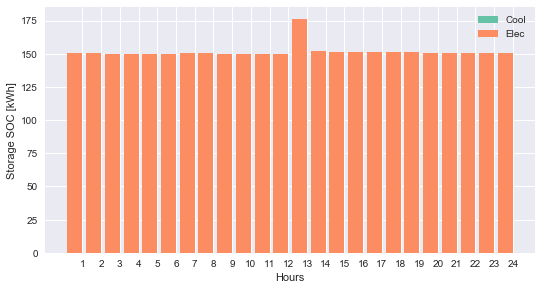

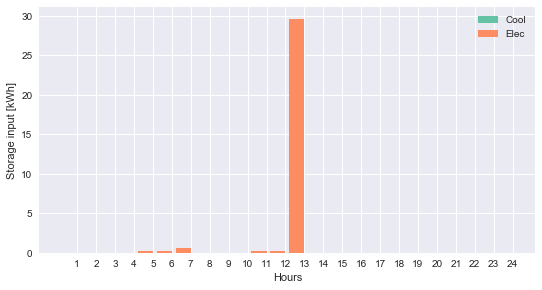

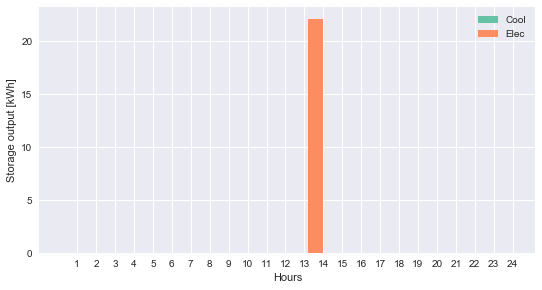

In [10]:
no_days=1
i=65
fig,ax=plot_stackedBars(Heat_Out_df,1+i*24,24*no_days+i*24,y_label="Heat [kWh]")
fig.savefig("Day{}_HeatOut.png".format(i),dpi=200)

fig,ax=plot_stackedBars(Ele_Out_df,1+i*24,24*no_days+i*24)
fig.savefig("Day{}_EleOut.png".format(i),dpi=200)

fig,ax=plot_stackedBars(Energy_In_df,1+i*24,24*no_days+i*24)
fig.savefig("Day{}_EnergyInput.png".format(i),dpi=200)

#fig,ax=plot_stackedBars(binary_df,1+i*24,24*no_days+i*24)
#fig.savefig("Day{}_Activation.png".format(i),dpi=200)

#fig,ax=plot_stackedBars(P_Trl_df[["WeeklyBid","DailyBid","LMBid"]],1+i*24,24*no_days+i*24)
#fig.savefig("Day{}_P_TRL.png".format(i),dpi=200)

#fig,ax=plot_stackedBars(Income_E_Trl_df[["WeeklyBid","DarilyBid","LMBid"]],1+i*24,24*no_days+i*24,y_label="Income for energy sold [CHF/kWh]")
#fig.savefig("Day{}_Income_E_TRL.png".format(i),dpi=200)

#fig,ax=plot_stackedBars(Income_P_Trl_df[["WeeklyBid","DailyBid"]],1+i*24,24*no_days+i*24,y_label="Income for Capacity sold [CHF/kWh]")
#fig.savefig("Day{}_Income_P_TRL.png".format(i),dpi=200)


fig,ax=plot_stackedBars(Demands_df,1+i*24,24*no_days+i*24,y_label="Demands [kWh]")
fig.savefig("Day{}_Demands.png".format(i),dpi=200)

fig,ax=plot_stackedBars(Storage_SOC_df,1+i*24,24*no_days+i*24,y_label="Storage SOC [kWh]")
fig.savefig("Day{}_StorageSOC.png".format(i),dpi=200)

fig,ax=plot_stackedBars(Storage_In_df,1+i*24,24*no_days+i*24,y_label="Storage input [kWh]")
fig.savefig("Day{}_StorageIn.png".format(i),dpi=200)

fig,ax=plot_stackedBars(Storage_Out_df,1+i*24,24*no_days+i*24,y_label="Storage output [kWh]")
fig.savefig("Day{}_StorageOut.png".format(i),dpi=200)